# NoSQL (MongoDB) (sesión 4)

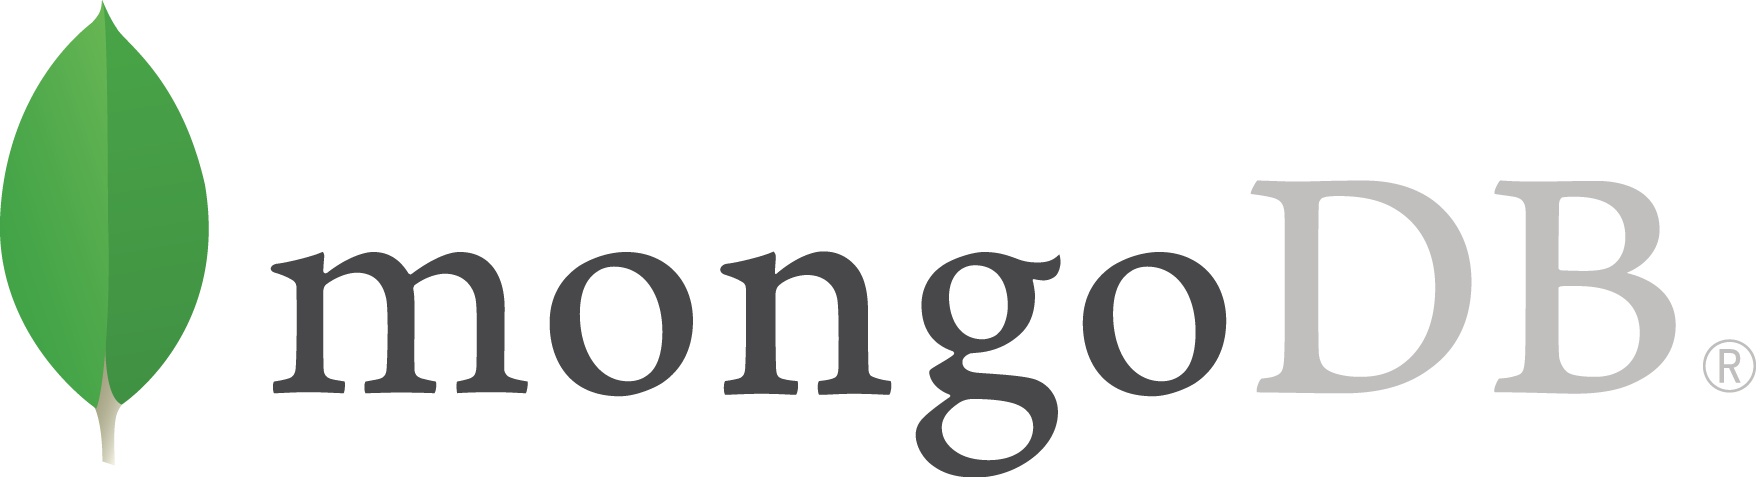

Esta hoja muestra cómo acceder a bases de datos MongoDB y también a conectar la salida con Jupyter. Se puede utilizar el *shell* propio de MongoDB en la máquina virtual usando el programa `mongo`. La diferencia es que ese programa espera código Javascript y aquí trabajaremos con Python.

In [ ]:
!pip install --upgrade pymongo

In [ ]:
from pprint import pprint as pp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot')

Usaremos la librería `pymongo` para python. La cargamos a continuación.

In [ ]:
import pymongo
from pymongo import MongoClient

La conexión se inicia con `MongoClient` en el `host` descrito en el fichero `docker-compose.yml` (`mongo`).

In [ ]:
client = MongoClient("localhost",27017)
client

In [ ]:
client.database_names()

 - Format: 7zipped
 - Files:
   - **badges**.xml
       - UserId, e.g.: "420"
       - Name, e.g.: "Teacher"
       - Date, e.g.: "2008-09-15T08:55:03.923"
   - **comments**.xml
       - Id
       - PostId
       - Score
       - Text, e.g.: "@Stu Thompson: Seems possible to me - why not try it?"
       - CreationDate, e.g.:"2008-09-06T08:07:10.730"
       - UserId
   - **posts**.xml
       - Id
       - PostTypeId
          - 1: Question
          - 2: Answer
       - ParentID (only present if PostTypeId is 2)
       - AcceptedAnswerId (only present if PostTypeId is 1)
       - CreationDate
       - Score
       - ViewCount
       - Body
       - OwnerUserId
       - LastEditorUserId
       - LastEditorDisplayName="Jeff Atwood"
       - LastEditDate="2009-03-05T22:28:34.823"
       - LastActivityDate="2009-03-11T12:51:01.480"
       - CommunityOwnedDate="2009-03-11T12:51:01.480"
       - ClosedDate="2009-03-11T12:51:01.480"
       - Title=
       - Tags=
       - AnswerCount
       - CommentCount
       - FavoriteCount
   - **posthistory**.xml
	   - Id
	   - PostHistoryTypeId
			- 1: Initial Title - The first title a question is asked with.
			- 2: Initial Body - The first raw body text a post is submitted with.
			- 3: Initial Tags - The first tags a question is asked with.
			- 4: Edit Title - A question's title has been changed.
			- 5: Edit Body - A post's body has been changed, the raw text is stored here as markdown.
			- 6: Edit Tags - A question's tags have been changed.
			- 7: Rollback Title - A question's title has reverted to a previous version.
			- 8: Rollback Body - A post's body has reverted to a previous version - the raw text is stored here.
			- 9: Rollback Tags - A question's tags have reverted to a previous version.
			- 10: Post Closed - A post was voted to be closed.
			- 11: Post Reopened - A post was voted to be reopened.
			- 12: Post Deleted - A post was voted to be removed.
			- 13: Post Undeleted - A post was voted to be restored.
			- 14: Post Locked - A post was locked by a moderator.
			- 15: Post Unlocked - A post was unlocked by a moderator.
			- 16: Community Owned - A post has become community owned.
			- 17: Post Migrated - A post was migrated.
			- 18: Question Merged - A question has had another, deleted question merged into itself.
			- 19: Question Protected - A question was protected by a moderator
			- 20: Question Unprotected - A question was unprotected by a moderator
			- 21: Post Disassociated - An admin removes the OwnerUserId from a post.
			- 22: Question Unmerged - A previously merged question has had its answers and votes restored.
		- PostId
		- RevisionGUID: At times more than one type of history record can be recorded by a single action.  All of these will be grouped using the same RevisionGUID
		- CreationDate: "2009-03-05T22:28:34.823"
		- UserId
		- UserDisplayName: populated if a user has been removed and no longer referenced by user Id
		- Comment: This field will contain the comment made by the user who edited a post
		- Text: A raw version of the new value for a given revision
			- If PostHistoryTypeId = 10, 11, 12, 13, 14, or 15  this column will contain a JSON encoded string with all users who have voted for the PostHistoryTypeId
			- If PostHistoryTypeId = 17 this column will contain migration details of either "from <url>" or "to <url>"
		- CloseReasonId
			- 1: Exact Duplicate - This question covers exactly the same ground as earlier questions on this topic; its answers may be merged with another identical question.
			- 2: off-topic
			- 3: subjective
			- 4: not a real question
			- 7: too localized
   - **postlinks**.xml
     - Id
     - CreationDate
     - PostId
     - RelatedPostId
     - PostLinkTypeId
       - 1: Linked
       - 3: Duplicate
   - **users**.xml
     - Id
     - Reputation
     - CreationDate
     - DisplayName
     - EmailHash
     - LastAccessDate
     - WebsiteUrl
     - Location
     - Age
     - AboutMe
     - Views
     - UpVotes
     - DownVotes
   - **votes**.xml
     - Id
     - PostId
     - VoteTypeId
        - ` 1`: AcceptedByOriginator
        - ` 2`: UpMod
        - ` 3`: DownMod
        - ` 4`: Offensive
        - ` 5`: Favorite - if VoteTypeId = 5 UserId will be populated
        - ` 6`: Close
        - ` 7`: Reopen
        - ` 8`: BountyStart
        - ` 9`: BountyClose
        - `10`: Deletion
        - `11`: Undeletion
        - `12`: Spam
        - `13`: InformModerator
     - CreationDate
     - UserId (only for VoteTypeId 5)
     - BountyAmount (only for VoteTypeId 9)

In [ ]:
%%bash
file=../Posts.csv
test -e $file || wget http://neuromancer.inf.um.es:8080/es.stackoverflow/`basename ${file}`.gz -O - 2>/dev/null | gunzip > $file

In [ ]:
%%bash
file=../Users.csv
test -e $file || wget http://neuromancer.inf.um.es:8080/es.stackoverflow/`basename ${file}`.gz -O - 2>/dev/null | gunzip > $file

In [ ]:
%%bash
file=../Tags.csv
test -e $file || wget http://neuromancer.inf.um.es:8080/es.stackoverflow/`basename ${file}`.gz -O - 2>/dev/null | gunzip > $file

In [ ]:
%%bash
file=../Comments.csv
test -e $file || wget http://neuromancer.inf.um.es:8080/es.stackoverflow/`basename ${file}`.gz -O - 2>/dev/null | gunzip > $file

In [ ]:
%%bash
file=../Votes.csv
test -e $file || wget http://neuromancer.inf.um.es:8080/es.stackoverflow/`basename ${file}`.gz -O - 2>/dev/null | gunzip > $file

Las bases de datos se crean conforme se nombran. Se puede utilizar la notación punto o la de diccionario. Las colecciones también.

In [ ]:
db = client.stackoverflow
db = client['stackoverflow']
db

Las bases de datos están compuestas por un conjunto de **colecciones**. Cada colección aglutina a un conjunto de objetos (documentos) del mismo tipo, aunque como vimos en teoría, cada documento puede tener un conjunto de atributos diferente.

In [ ]:
posts = db.posts
posts

Importación de los ficheros CSV. Por ahora creamos una colección diferente para cada uno. Después estudiaremos cómo poder optimizar el acceso usando agregación.

In [ ]:
%%bash
sudo apt-get update
sudo apt-get install -y mongodb-clients

In [ ]:
%%bash
mongoimport --db stackoverflow --collection posts --drop --type csv \
    --headerline --host=mongo --file ../Posts.csv

In [ ]:
%%bash
mongoimport --db stackoverflow --collection users --drop --type csv \
   --headerline --host=mongo --file ../Users.csv

In [ ]:
%%bash
mongoimport --db stackoverflow --collection votes --drop --type csv \
   --headerline --host=mongo --file ../Votes.csv

In [ ]:
%%bash
mongoimport --db stackoverflow --collection comments --drop --type csv \
   --headerline --host=mongo --file ../Comments.csv

In [ ]:
%%bash
mongoimport --db stackoverflow --collection tags --drop --type csv \
   --headerline --host=mongo --file ../Tags.csv

In [ ]:
posts.count()

In [ ]:
client.admin.command('enableSharding', 'stackoverflow')

In [ ]:
posts.save({'Id':1})

In [ ]:
db.shardCollection('stackoverflow.posts')

El API de colección en Python se puede encontrar aquí: https://api.mongodb.com/python/current/api/pymongo/collection.html. La mayoría de libros y referencias muestran el uso de mongo desde Javascript, ya que el *shell* de MongoDB acepta ese lenguaje. La sintaxis con respecto a Python cambia un poco, y se puede seguir en el enlace anterior.

## Map-Reduce

Mongodb incluye dos APIs para procesar y buscar documentos: el API de Map-Reduce y el API de agregación. Veremos primero el de Map-Reduce. Manual: https://docs.mongodb.com/manual/aggregation/#map-reduce

![imagen](https://docs.mongodb.com/manual/_images/map-reduce.bakedsvg.svg)

In [ ]:
from bson.code import Code

In [ ]:
map = Code(
'''
function () {
    emit(this.OwnerUserId, 1);
}
''')

In [ ]:
reduce = Code(
'''
function (key, values)
{
    return Array.sum(values);
}
''')

In [ ]:
results = posts.map_reduce(map, reduce, "posts_by_userid")

In [ ]:
posts_by_userid = db.posts_by_userid
list(posts_by_userid.find())

Se le puede añadir una etiqueta para especificar sobre qué elementos queremos trabajar (`query`):

La función `map_reduce` puede llevar añadida una serie de *keywords*, los mismos especificados en la documentación:

- `query`: Restringe los datos que se tratan
- `sort`: Ordena los documentos de entrada por alguna clave
- `limit`: Limita el número de resultados
- `out`: Especifica la colección de salida y otras opciones. Lo veremos después.
- etc.

En el parámetro `out` se puede especificar en qué colección se quedarán los datos resultado del map-reduce. Por defecto, en la colección origen. (Todos los parámetros aquí: https://docs.mongodb.com/manual/reference/command/mapReduce/#mapreduce-out-cmd). En la operación `map_reduce()`  podemos especificar la colección de salida, pero también podemos añadir un parámetro final `out={...}`.

Hay varias posibilidades para `out`:

- `replace`: Sustituye la colección, si la hubiera, con la especificada (p. ej.: `out={ "replace" : "coll" }`.
- `merge`: Mezcla la colección existente, sustituyendo los documentos que existan por los generados.
- `reduce`: Si existe un documento con el mismo \_id en la colección, se aplica la función `reduce` para *fusionar* ambos documentos y producir un nuevo documento.

Veremos a continuación, al resolver el ejercicio de crear `post_comments` con map-reduce cómo se utilizan estas posibilidades.

También hay operaciones específicas de la coleción, como `count()`, `groupby()` y `distinct()`:
![distinct](https://docs.mongodb.com/manual/_images/distinct.bakedsvg.svg)

In [ ]:
db.posts.distinct('Score')

## EJERCICIO: Construir, con el API de Map-Reduce, una colección 'post_comments', donde se añade el campo 'Comments' a cada Post con la lista de todos los comentarios referidos a un Post.

Veremos la resolución de este ejercicio para que haga de ejemplo para los siguientes a implementar. En primer lugar, una operación map/reduce sólo se puede ejecutar sobre una colección, así que sólo puede contener resultados de la misma. Por lo tanto, con sólo una operación map/reduce no va a ser posible realizar todo el ejercicio.

Así, en primer lugar, parece interesante agrupar todos los comentarios que se han producido de un Post en particular. En cada comentario, el atributo `PostId` marca una referencia al Post al que se refiere.

Es importante cómo se construyen las operaciones `map()` y `reduce()`. Primero, la función `map()` se ejecutará para todos los documentos (o para todos los que cumplan la condición si se utiliza el modificador `query=`). Sin embargo, la función `reduce()` no se ejecutará a no ser que haya más de un elemento asociado a la misma clave.

Por lo tanto, la salida de la función `map()` debe ser la misma que la de la función `reduce()`. En nuestro caso, es un objeto JSON de la forma:

    { type: 'comment', comments: [ {comentario1, comentario2} ] }

En el caso de que sólo se ejecute la función `map()`, nótese cómo el objeto tiene la misma composición, pero con un array de sólo un elemento (comentario): sí mismo.

In [ ]:
from bson.code import Code

comments_map = Code('''
function () {
  emit(this.PostId, { type: 'comment', comments: [this]});
}
''')

comments_reduce = Code('''
function (key, values) {
    comments = [];
    for (i = 0, len = values.length; i < len; ++i) {
        if ('comments' in values[i])
            comments = comments.concat(values[i].comments);
    }
    return { type: 'comment', comments: comments };
}
''')

db.comments.map_reduce(comments_map, comments_reduce, "post_comments")

In [ ]:
pc = db.post_comments.find()
list(pc[:10])

Esto demuestra que en general el esquema de datos en MongoDB no estaría así desde el principio.

Después del primer paso de map/reduce, tenemos que construir la colección final que asocia cada Post con sus comentarios. Como hemos construido antes la colección `post_comments` indizada por el `Id` del Post, podemos utilizar ahora una ejecución de map/reduce que *mezcle* los datos en `post_comments` con los datos en `posts`.

La segunda ejecución de map/reduce la haremos sobre `posts`, para que el resultado sea completo, incluso para los Posts que no aparecen en comentarios, y por lo tanto tendrán el atributo `comments` vacío.

En este caso, debemos hacer que la función `map()` produzca una salida de documentos que también están indizados con el atributo `Id`, y, como sólo hay uno para cada `Id`, la función `reduce()` no se ejecutará. **Tan sólo se ejecutará para mezclar ambas colecciones**, así que la función `reduce()` tendrá que estar preparada para mezclar objetos de tipo "comment" y Posts. En cualquier caso, como se puede ver, es válida también aunque sólo se llame con un objeto de tipo Post. Finalmente, la función `map()` prepara a cada objeto Post, inicialmente, con una lista de comentarios vacíos

In [ ]:
posts_map = Code("""
function () {
  obj = this;
  obj.comments = [];
  emit(this.Id, obj);
}
""")

posts_reduce = Code("""
function (key, values) {
  comments = []; // The set of comments
  obj = {}; // The object to return
  
  for (i = 0, len = values.length; i < len; ++i) {
    if ('type' in values[i] && values[i].type === 'comment')
      comments = comments.concat(values[i].comments);
    else // Object
    {
      obj = values[i];
      // obj.comments will always be there because of the map() operation
      comments = comments.concat(obj.comments);
    }
  }
  
  // Finalize: Add the comments to the object to return
  obj.comments = comments;
  return obj;
}
""")

db.posts.map_reduce(posts_map, posts_reduce, out={'reduce' : 'post_comments'})

In [ ]:
pc = list(db.post_comments.find())
pc[:30]

## Framework de Agregación

Framework de agregación: https://docs.mongodb.com/manual/reference/operator/aggregation/. Y aquí una presentación interesante sobre el tema: https://www.mongodb.com/presentations/aggregation-framework-0?jmp=docs&_ga=1.223708571.1466850754.1477658152

![agragación](https://docs.mongodb.com/manual/_images/aggregation-pipeline.bakedsvg.svg)

Proyección:

In [ ]:
respuestas = db['posts'].aggregate( [ {'$project' : { 'Id' : True }}, {'$limit': 20} ])
list(respuestas)

_Lookup_!

In [ ]:
respuestas = posts.aggregate( [
        {'$match': { 'Score' : {'$gte': 40}}},
        {'$lookup': {
            'from': "users", 
            'localField': "OwnerUserId",
            'foreignField': "Id",
            'as': "owner"}
        }
        ])
list(respuestas)

El `$lookup` genera un _array_ con todos los resultados. El operador `$arrayElementAt` accede al primer elemento.

In [ ]:
respuestas = db.posts.aggregate( [
        {'$match': { 'Score' : {'$gte': 40}}},
        {'$lookup': {
            'from': "users", 
            'localField': "OwnerUserId",
            'foreignField': "Id",
            'as': "owner"}
        },
        { '$project' :
        {
            'Id' : True,
            'Score' : True,
            'username' : {'$arrayElemAt' : ['$owner.DisplayName', 0]},
            'owner.DisplayName'  : True
        }}
        ])
list(respuestas)

`$unwind` también puede usarse. "Desdobla" cada fila por cada elemento del array. En este caso, como sabemos que el array sólo contiene un elemento, sólo habrá una fila por fila original, pero sin el _array_. Finalmente se puede proyectar el campo que se quiera.

In [ ]:
respuestas = db.posts.aggregate( [
        {'$match': { 'Score' : {'$gte': 40}}},
        {'$lookup': {
            'from': "users", 
            'localField': "OwnerUserId",
            'foreignField': "Id",
            'as': "owner"}
        },
        { '$unwind': '$owner'},
        { '$project' : 
         {
             'username': '$owner.DisplayName'
         }
        }
        ])
list(respuestas)

## EJERCICIO: Relacionar en un scatterplot el 'Score' de una pregunta o respuesta con respecto al número de comentarios ('CommentCount')

## EJERCICIO: Con Map-Reduce y con el Framework de Agregación, mostrar las consultas RQ1, RQ2 y RQ3 de la sesión 2

### Ejemplo de realización de la consulta RQ4

Como ejemplo de consulta compleja con el Framework de Agregación, adjunto una posible solución a la consulta RQ4:

In [ ]:
RQ4 = posts.aggregate( [
        {'$match': { 'AcceptedAnswerId' : {'$ne': ''}}},
        {'$lookup': {
            'from': "posts", 
            'localField': "AcceptedAnswerId",
            'foreignField': "Id",
            'as': "answer"}
        },
        {
            '$project' : {'OwnerUserId': True, 
                           'answerer' : {'$arrayElemAt' :[ '$answer.OwnerUserId' , 0 ]}}
        },
        {
            '$group' : {'_id' : {'min' : { '$min' : ['$OwnerUserId' , '$answerer'] },
                                 'max' : { '$max' : ['$OwnerUserId' , '$answerer'] }},
                        'answers' : {'$addToSet' : { '0q':'$OwnerUserId', '1a': '$answerer'}}
                        }
        },
        {
            '$project': {
                'answers' : True,
                'nanswers' : { '$size' : '$answers'}
            }
        },
        {
            '$match' : { 'nanswers' : { '$eq' : 2}}
        }
    ])
print_respuestas(RQ4)

La explicación es como sigue:

1. Se eligen sólo las preguntas que tienen respuesta (campo `AcceptedAnswerId` no es vacío)
2. Se accede a la tabla `posts` para recuperar los datos de la respuesta
3. A continuación se proyectan sólo el usuario que pregunta y el que hace la respuesta
4. El paso más imaginativo es el de agrupación. Lo que se intenta es que ambos pares de usuarios que están relacionados como preguntante -> respondiente y viceversa, caigan en la misma clave. Por ello, se coge el máximo y el mínimo de ambos identificadores de usuarios y se construye una clave con ambos números en las mismas posiciones. Así, ambas combinaciones de usuario que pregunta y que responde caerán en la misma clave. También se usa un conjunto (en `answers`), y sólo se añadirá una vez las posibles combinaciones iguales de preguntador/respondiente.
5. Sólo nos interesan aquellas tuplas cuyo tamaño del conjunto de pares de pregunta/respuesta sea igual a dos (en un elemento uno de los dos usuarios habrá preguntado y el otro habrá respondido y en el otro viceversa).

La implementación en Map-Reduce se puede realizar con la misma idea.

En el caso de que queramos tener como referencia las preguntas y respuestas a las que se refiere la conversación, se puede añadir un campo más que guarde todas las preguntas junto con sus respuestas consideradas 

In [ ]:
RQ4 = posts.aggregate( [
        {'$match': { 'AcceptedAnswerId' : {'$ne': ''}}},
        {'$lookup': {
            'from': "posts", 
            'localField': "AcceptedAnswerId",
            'foreignField': "Id",
            'as': "answer"}
        },
        {
            '$project' : {'OwnerUserId': True,
                          'QId' : '$Id',
                          'AId' : '$answer.Id',
                          'answerer' : {'$arrayElemAt' :[ '$answer.OwnerUserId' , 0 ]}}
        },
        {
            '$group' : {'_id' : {'min' : { '$min' : ['$OwnerUserId' , '$answerer'] },
                                 'max' : { '$max' : ['$OwnerUserId' , '$answerer'] }},
                        'answers' : {'$addToSet' : { '0q':'$OwnerUserId', '1a': '$answerer'}},
                        'considered_pairs' : { '$push' : {'QId' : '$QId', 'AId' : '$AId'}}
                        }
        },
        {
            '$project': {
                'answers' : True,
                'nanswers' : { '$size' : '$answers'},
                'considered_pairs' : True
            }
        },
        {
            '$match' : { 'nanswers' : { '$eq' : 2}}
        }
    ])
print_respuestas(RQ4)

In [ ]:
(posts.find_one({'Id': 238}), posts.find_one({'Id': 243}),
posts.find_one({'Id': 222}), posts.find_one({'Id': 223}))